In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

salaries = pd.read_csv('/content/drive/My Drive/salaries.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
salaries.head(20)

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
fields = ['company','job','degree',]

In [ ]:
lb = LabelEncoder()

In [ ]:
for field in fields:
  salaries[field] = lb.fit_transform(salaries[field])

In [ ]:
X = salaries.drop('salary_more_then_100k',axis=1)
y = salaries['salary_more_then_100k']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)

In [ ]:
clf_gini = DecisionTreeClassifier(random_state=42)

In [ ]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = clf_gini.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.75


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

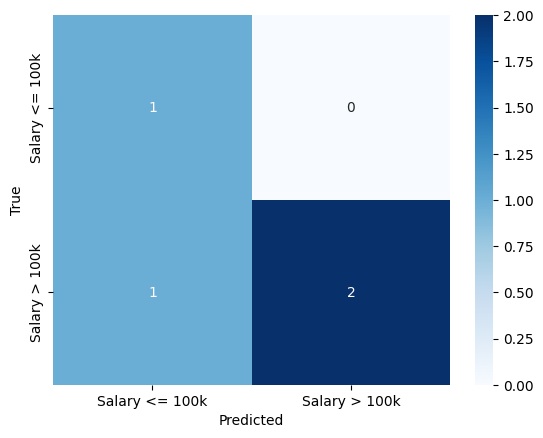

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Salary <= 100k', 'Salary > 100k'], yticklabels=['Salary <= 100k', 'Salary > 100k'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

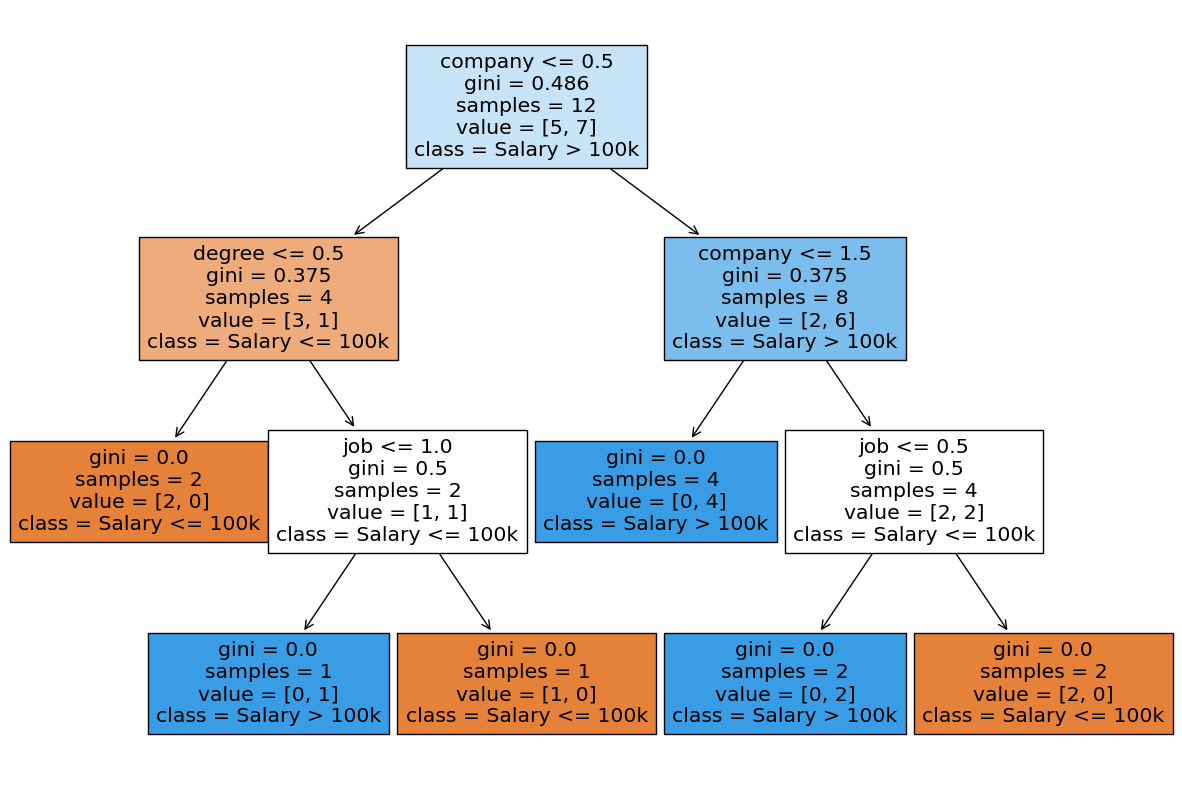

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(clf_gini, filled=True, feature_names=list(X.columns), class_names=['Salary <= 100k', 'Salary > 100k'])
plt.show()


In [ ]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=20)

In [ ]:
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=20)

In [ ]:
y_pred = clf_entropy.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.75


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


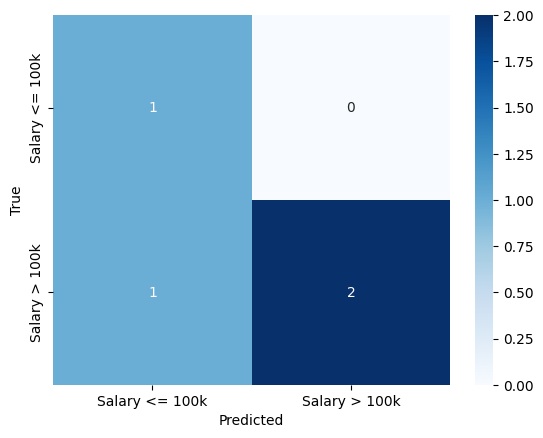

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Salary <= 100k', 'Salary > 100k'], yticklabels=['Salary <= 100k', 'Salary > 100k'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

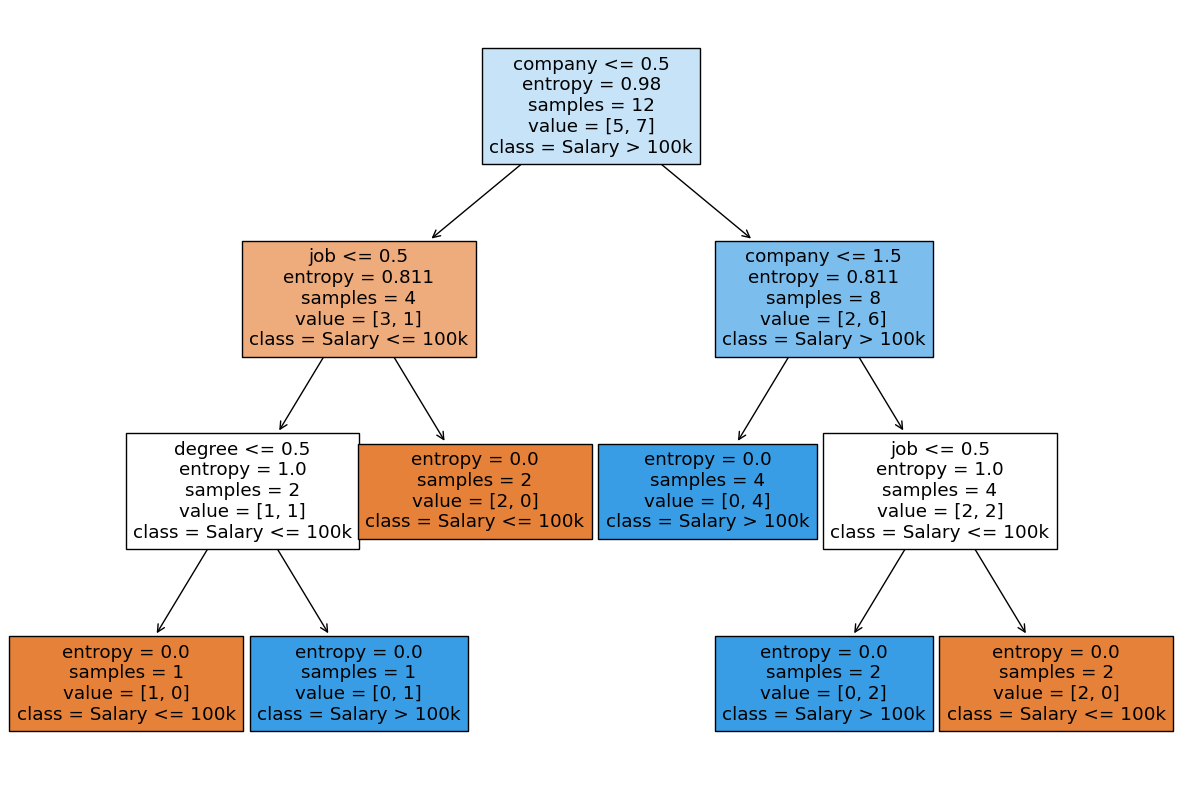

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(clf_entropy, filled=True, feature_names=list(X.columns), class_names=['Salary <= 100k', 'Salary > 100k'])
plt.show()